## Why do it ?
- Because Tech is exciting, but unpredictable.
- A back-up income strategy is needed.
- For Happy / Early Retirement


## Case Study:

- Buy single family house in expanding job market in __South Carolina__
- Be lazy for 10 years and collect rent
- Check back to see value increase 4x times after 10 years


## Factors considered for property investment:
- Cost of single family house
- School ratings
- Job growth
- Crime rate
- Cost-to-Rent ratio

## Data Sources:

- Zipcode Csv file from USPS (https://tools.usps.com/go/ZipLookupAction_input)

- Rental Data from City Data API (http://www.city-data.com/)

- Rental & Cost of Single Family House from Zillow (https://www.zillow.com/howto/api/APIOverview.htm)

- Property Data from Quandl API (https://www.quandl.com/tools/api)    
    
- Great Schools API (https://www.greatschools.org/)  

- Crime Rate Data retrieved from Crime Rate website (http://www.crimerate.com/)            

- Job Growth Data retrieved from Bureau of Labor Statistics (https://www.bls.gov/sae/#tables)


##  Retrieval Methods:

- APIs to retrieve data using requests module
- Web scraping using BeautifulSoup module
- Converting XML data to python dictionaries using XmlDict module
- Converting HTML tags into text and selecting data using split function
- Converting unstructured scraped data using regular expressions
- Python Pandas for aggregation and clean up of data
         

## Data Summary & Metrics
- Data retrieved for 407 zip codes in South Carolina state.
- After cleanup and aggregation, final data set contains data for 206 zip codes
- Normalization of 'Rent', 'School Ratings', 'Job Growth' & 'Crime Rate' to a factor of '1'
- Summary metric derived by adding the normalized values


### Mapping Function.

In [1]:
import os
import numpy as np
import pandas as pd
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import folium
from folium import plugins
from folium.plugins import ImageOverlay
from scipy.ndimage import imread

In [2]:
data = pd.read_csv("../data/final_investment_criteria_truncated_numbers.csv")
data.head()

,Unnamed: 0,Unnamed: 0.1,zip,latitude,longitude,Cost of Single Family Home,Rent,Normalized Ratio,School Rating,Total Crimes,job_growth_per,job_growth_per_nom,Normalized Ratio_nom,Total Crimes_nom,School Rating_nom,summary_metric
0,0,0,29003,33.29,-81.03,208300,719,0.835324,4.7,-185,-0.7,-0.53,0.68,-0.10,1.10,1.15
1,1,1,29009,34.41,-80.34,80700,705,2.114126,4.0,-5,2.1,1.58,1.71,0.00,0.94,4.22
2,2,2,29010,34.21,-80.24,208300,694,0.806279,2.3,-311,2.1,1.58,0.65,-0.17,0.54,2.60
3,3,3,29018,33.34,-80.68,81000,612,1.828444,0.0,-35,2.1,1.58,1.48,-0.02,0.00,3.04
4,4,4,29020,34.26,-80.61,110400,719,1.576069,4.2,-605,2.1,1.58,1.27,-0.34,0.98,3.50


### THE REAL CRAP.

/Users/sureshdata/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


done


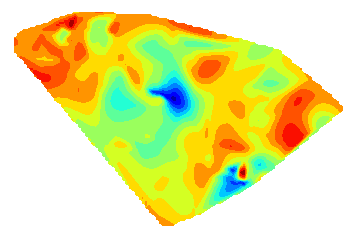

In [3]:
df4 = data[["latitude", "longitude", "School Rating_nom"]]
df5 = data[["latitude", "longitude", "Total Crimes_nom"]]
df6 = data[["latitude", "longitude", "job_growth_per_nom"]]

# Build the base maps.
%matplotlib inline
    
map_osm1 = folium.Map([33., -80.], tiles='stamentoner', zoom_start=7.4)
map_osm2 = folium.Map([33., -80.], tiles='stamentoner', zoom_start=7.4)
map_osm3 = folium.Map([33., -80.], tiles='stamentoner', zoom_start=7.4)
map_osm3a = folium.Map([33., -80.], tiles='stamentoner', zoom_start=7.4)
map_osm3b = folium.Map([33., -80.], tiles='stamentoner', zoom_start=7.4)
map_osm3c = folium.Map([33., -80.], tiles='stamentoner', zoom_start=7.4)
map_osm3d = folium.Map([33., -80.], tiles='stamentoner', zoom_start=7.4)
map_osm4 = folium.Map([33., -80.], tiles='stamentoner', zoom_start=7.4)
map_osm5 = folium.Map([33., -80.], tiles='stamentoner', zoom_start=7.4)
map_osm6 = folium.Map([33., -80.], tiles='stamentoner', zoom_start=7.4)
map_osm7 = folium.Map([33., -80.], tiles='stamentoner', zoom_start=7.4)


# top ten tabs.
df4a = df4.sort_values("School Rating_nom", ascending = False)[0:10]
df5a = df5.sort_values("Total Crimes_nom", ascending = True)[0:10]
df5b = df5.sort_values("Total Crimes_nom", ascending = False)[0:10]
df6a = df6.sort_values("job_growth_per_nom", ascending = False)[0:10]

# add the tabs to the map.
for x in range(len(df4a["School Rating_nom"])):
    folium.Marker([df4a["latitude"].iloc[x], df4a["longitude"].iloc[x]],
                    popup="School Rating: " + str(df4a["School Rating_nom"].iloc[x])).add_to(map_osm3a)

for x in range(len(df5a["Total Crimes_nom"])):
    folium.Marker([df5a["latitude"].iloc[x], df5a["longitude"].iloc[x]],
                    popup="Total Crimes: " + str(df5a["Total Crimes_nom"].iloc[x])).add_to(map_osm3b)
    
for x in range(len(df5b["Total Crimes_nom"])):
    folium.Marker([df5b["latitude"].iloc[x], df5b["longitude"].iloc[x]],
                    popup="Total Crimes: " + str(df5b["Total Crimes_nom"].iloc[x])).add_to(map_osm3c)

for x in range(len(df6a["job_growth_per_nom"])):
    folium.Marker([df6a["latitude"].iloc[x], df6a["longitude"].iloc[x]],
                    popup="Job Growth: " + str(df6a["job_growth_per_nom"].iloc[x])).add_to(map_osm3d)
    
    
# do the contour maps.
x = data["longitude"]
y = data["latitude"]
z1 = data["Cost of Single Family Home"]
xi = np.linspace(data["longitude"].min(), data["longitude"].max(), 100)
yi = np.linspace(data["latitude"].min(), data["latitude"].max(), 100)
zi = griddata((x, y), z1, (xi[None,:], yi[:,None]), method = "cubic")
CS = plt.contourf(xi, yi, zi, 15, cmap=plt.cm.jet)
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
ax = plt.subplot()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
plt.savefig("overlay1.png")

x = data["longitude"]
y = data["latitude"]
z2 = data["Rent"]
xi = np.linspace(data["longitude"].min(), data["longitude"].max(), 100)
yi = np.linspace(data["latitude"].min(), data["latitude"].max(), 100)
zi = griddata((x, y), z2, (xi[None,:], yi[:,None]), method = "cubic")
CS = plt.contourf(xi, yi, zi, 15, cmap=plt.cm.jet)
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
ax = plt.subplot()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
plt.savefig("overlay2.png")


x = data["longitude"]
y = data["latitude"]
z3 = data["Normalized Ratio_nom"]
xi = np.linspace(data["longitude"].min(), data["longitude"].max(), 100)
yi = np.linspace(data["latitude"].min(), data["latitude"].max(), 100)
zi = griddata((x, y), z3, (xi[None,:], yi[:,None]), method = "cubic")
CS = plt.contourf(xi, yi, zi, 15, cmap=plt.cm.jet)
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
ax = plt.subplot()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
plt.savefig("overlay3.png")


x = data["longitude"]
y = data["latitude"]
z4 = data["School Rating_nom"]
xi = np.linspace(data["longitude"].min(), data["longitude"].max(), 100)
yi = np.linspace(data["latitude"].min(), data["latitude"].max(), 100)
zi = griddata((x, y), z4, (xi[None,:], yi[:,None]), method = "cubic")
CS = plt.contourf(xi, yi, zi, 15, cmap=plt.cm.jet)
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
ax = plt.subplot()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
plt.savefig("overlay4.png")


x = data["longitude"]
y = data["latitude"]
z5 = data["Total Crimes_nom"]
xi = np.linspace(data["longitude"].min(), data["longitude"].max(), 100)
yi = np.linspace(data["latitude"].min(), data["latitude"].max(), 100)
zi = griddata((x, y), z5, (xi[None,:], yi[:,None]), method = "cubic")
CS = plt.contourf(xi, yi, zi, 15, cmap=plt.cm.jet)
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
ax = plt.subplot()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
plt.savefig("overlay5.png")


x = data["longitude"]
y = data["latitude"]
z6 = data["job_growth_per_nom"]
xi = np.linspace(data["longitude"].min(), data["longitude"].max(), 100)
yi = np.linspace(data["latitude"].min(), data["latitude"].max(), 100)
zi = griddata((x, y), z6, (xi[None,:], yi[:,None]), method = "cubic")
CS = plt.contourf(xi, yi, zi, 15, cmap=plt.cm.jet)
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
ax = plt.subplot()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
plt.savefig("overlay6.png")


x = data["longitude"]
y = data["latitude"]
z7 = data["summary_metric"]
xi = np.linspace(data["longitude"].min(), data["longitude"].max(), 100)
yi = np.linspace(data["latitude"].min(), data["latitude"].max(), 100)
zi = griddata((x, y), z7, (xi[None,:], yi[:,None]), method = "cubic")
CS = plt.contourf(xi, yi, zi, 15, cmap=plt.cm.jet)
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
ax = plt.subplot()
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
plt.savefig("overlay7.png")




# Do the overlay of the png contour map.
data1 = plt.imread('overlay1.png')
data2 = plt.imread("overlay2.png")
data3 = plt.imread("overlay3.png")
data4 = plt.imread("overlay4.png")
data5 = plt.imread("overlay5.png")
data6 = plt.imread("overlay6.png")
data7 = plt.imread("overlay7.png")



min_lon = data["longitude"].min()
max_lon = data["longitude"].max()
min_lat = data["latitude"].min()
max_lat = data["latitude"].max()

map_osm1.add_child(plugins.ImageOverlay(data1, opacity=0.5, interactive=True,
    cross_origin=False,
    zindex=1, 
    bounds =[[min_lat-0.6, min_lon-.9], [max_lat+0.5, max_lon+0.65]]))

map_osm2.add_child(plugins.ImageOverlay(data2, opacity=0.5, interactive=True,
    cross_origin=False,
    zindex=1, 
    bounds =[[min_lat-0.6, min_lon-.9], [max_lat+0.5, max_lon+0.65]]))

map_osm3.add_child(plugins.ImageOverlay(data3, opacity=0.5, interactive=True,
    cross_origin=False,
    zindex=1, 
    bounds =[[min_lat-0.6, min_lon-.9], [max_lat+0.5, max_lon+0.65]]))

map_osm3a.add_child(plugins.ImageOverlay(data3, opacity=0.5, interactive=True,
    cross_origin=False,
    zindex=1, 
    bounds =[[min_lat-0.6, min_lon-.9], [max_lat+0.5, max_lon+0.65]]))

map_osm3b.add_child(plugins.ImageOverlay(data3, opacity=0.5, interactive=True,
    cross_origin=False,
    zindex=1, 
    bounds =[[min_lat-0.6, min_lon-.9], [max_lat+0.5, max_lon+0.65]]))

map_osm3c.add_child(plugins.ImageOverlay(data3, opacity=0.5, interactive=True,
    cross_origin=False,
    zindex=1, 
    bounds =[[min_lat-0.6, min_lon-.9], [max_lat+0.5, max_lon+0.65]]))

map_osm3d.add_child(plugins.ImageOverlay(data3, opacity=0.5, interactive=True,
    cross_origin=False,
    zindex=1, 
    bounds =[[min_lat-0.6, min_lon-.9], [max_lat+0.5, max_lon+0.65]]))

map_osm4.add_child(plugins.ImageOverlay(data4, opacity=0.5, interactive=True,
    cross_origin=False,
    zindex=1, 
    bounds =[[min_lat-0.6, min_lon-.9], [max_lat+0.5, max_lon+0.65]]))

map_osm5.add_child(plugins.ImageOverlay(data5, opacity=0.5, interactive=True,
    cross_origin=False,
    zindex=1, 
    bounds =[[min_lat-0.6, min_lon-.9], [max_lat+0.5, max_lon+0.65]]))

map_osm6.add_child(plugins.ImageOverlay(data6, opacity=0.5, interactive=True,
    cross_origin=False,
    zindex=1, 
    bounds =[[min_lat-0.6, min_lon-.9], [max_lat+0.5, max_lon+0.65]]))

map_osm7.add_child(plugins.ImageOverlay(data7, opacity=0.5, interactive=True,
    cross_origin=False,
    zindex=1, 
    bounds =[[min_lat-0.6, min_lon-.9], [max_lat+0.5, max_lon+0.65]]))


print("done")

### High = Red (GOOD)
### Low = Blue (BAD)

### Cost of Single Family Home.

- Cost of single family house increases as we move closer towards the beach

In [4]:
map_osm1

### Rent.

In [5]:
map_osm2

### Cost/Rent Ratio.

- Rents are higher as we move closer to the coastal area and areas near the capital city Columbia


In [6]:
map_osm3

### School Rating.


In [7]:
map_osm4

### Crime Rating.

In [8]:
map_osm5

### Job Rating.

- More jobs in the areas closer to the coast and border of North Carolina


- Job growth is pretty consistent towards North-West of South Carolina

In [9]:
map_osm6

### Summary.

- North-East & North-West of South Carolina are the best places to invest.

In [10]:
map_osm7

### Cost/Rent Ratio v. School Rating--Top Ten.

In [11]:
map_osm3a

### Cost/Rent Ratio v. Crime--Worst Ten.

In [12]:
map_osm3b

### Cost/Rent Ratio v. Crime--Best Ten.

In [13]:
map_osm3c

### Cost/Rent Ratio v. Jobs--Top Ten.

In [14]:
map_osm3d

## Recommendations for investment:

- Areas closer to sea coast and towards the border of North Carolina have good scope of investment due to consistent job growth, low crime rate and decent schools.


- Not recommended to invest in inland areas of South Carolina that are closer to the capital city Columbia.


## Limitations / Assumptions :
- Data collected from single source for the factors to determine investment


- There may be more factors (like Weather, Transportation corridor, Natural disaters etc.) than what were considered for this analysis


- During normalization of stats, equal weightage given to all the factors